<a href="https://colab.research.google.com/github/rileykc98/478Project/blob/main/478Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, ZeroPadding2D
from tensorflow.keras import backend

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

4431872/4422102 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Label: 1


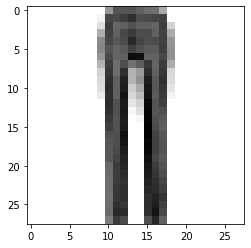

In [3]:
sample = 69
sample_image = x_train[sample]
plt.imshow(sample_image, cmap = "gray_r")
print("Label: {}".format(y_train[sample]))

In [4]:
num_classes = 10

# normalize and reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one hot labels
y_train = tf.utils.to_categorical(y_train, num_classes)
y_test = tf.utils.to_categorical(y_test, num_classes)



# 1. Baseline model



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 28)        7084      
                                                                 
 flatten_15 (Flatten)        (None, 3388)              0         
                                                                 
 dense_45 (Dense)            (None, 128)               433792    
                                                                 
 dense_46 (Dense)            (None, 128)               16512     
                                                     

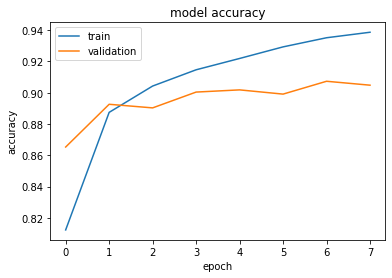

In [11]:
# hyper parameters
epochs = 8
batch_size = 256
learning_rate = 0.01

# define model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
model.build((None,28,28,1))
model.summary()

test_history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs,
          verbose=2,
          validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss: {}".format(score[0]))
print("Accuracy: {}".format(score[1]))

#  "Accuracy"
plt.plot(test_history.history['accuracy'])
plt.plot(test_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 2. Various learning rates

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 28)        7084      
                                                                 
 flatten_3 (Flatten)         (None, 3388)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               433792    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                      

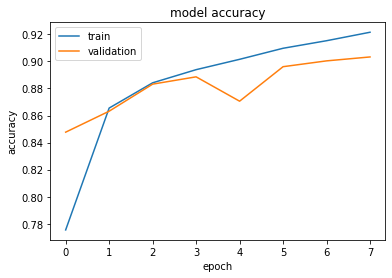

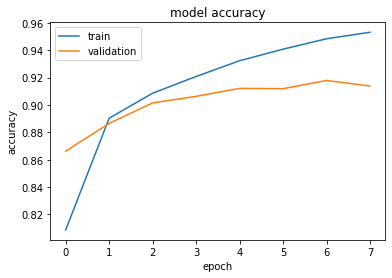

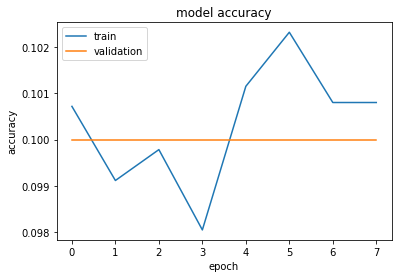

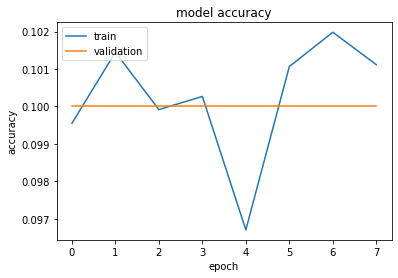

In [8]:
# hyper parameters
epochs = 8
batch_size = 256
learning_rates = [0.001, 0.005, 0.05, 0.1]
test_history_lr = [0,0,0,0]

for i in range(4):
  # define model
  model = Sequential()
  model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'sigmoid'))
  model.add(Dense(num_classes, activation = 'softmax'))
  optimizer = tf.optimizers.Adam(learning_rate=learning_rates[i])
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
  model.build((None,28,28,1))
  model.summary()

  test_history_lr[i] = model.fit(x_train, y_train, batch_size = batch_size,
            epochs = epochs,
            verbose=2,
            validation_data=(x_test,y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print("Loss: {}".format(score[0]))
  print("Accuracy: {}".format(score[1]))

#  "Accuracy"
for h in test_history_lr:
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

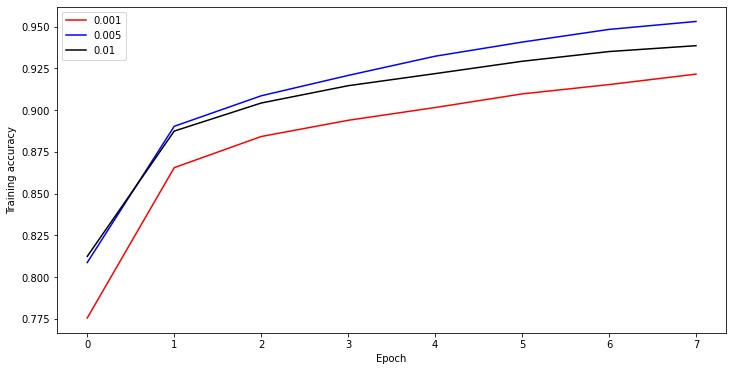

In [40]:
plt.figure(figsize=(12,6))

plt.plot(test_history_lr[0].history['accuracy'], c = 'r',label='0.001')
plt.plot(test_history_lr[1].history['accuracy'], c = 'b',label='0.005')
plt.plot(test_history.history['accuracy'], c = 'k',label='0.01')
# learning rates above 0.01 did not converge
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

# 3. Various batch sizes

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 28)        7084      
                                                                 
 flatten_11 (Flatten)        (None, 3388)              0         
                                                                 
 dense_33 (Dense)            (None, 128)               433792    
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                     

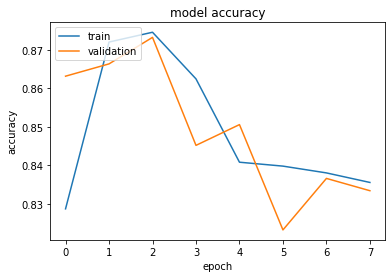

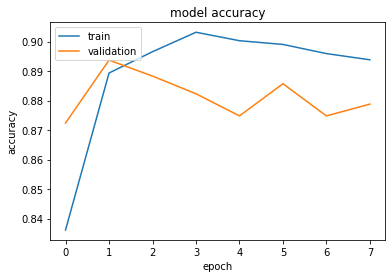

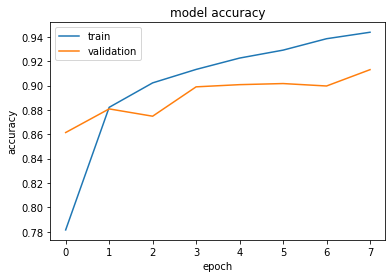

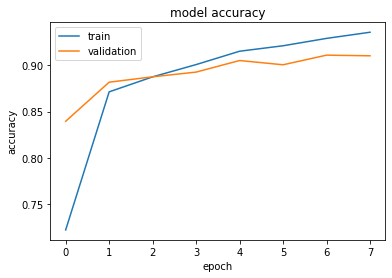

In [10]:
# hyper parameters
epochs = 8
batch_sizes = [64, 128, 512, 1024]
learning_rate = 0.01
test_history_bs = [0,0,0,0]

for i in range(4):
  # define model
  model = Sequential()
  model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'sigmoid'))
  model.add(Dense(num_classes, activation = 'softmax'))
  optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
  model.build((None,28,28,1))
  model.summary()

  test_history_bs[i] = model.fit(x_train, y_train, batch_size = batch_sizes[i],
            epochs = epochs,
            verbose=2,
            validation_data=(x_test,y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print("Loss: {}".format(score[0]))
  print("Accuracy: {}".format(score[1]))

#  "Accuracy"
for h in test_history_bs:
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

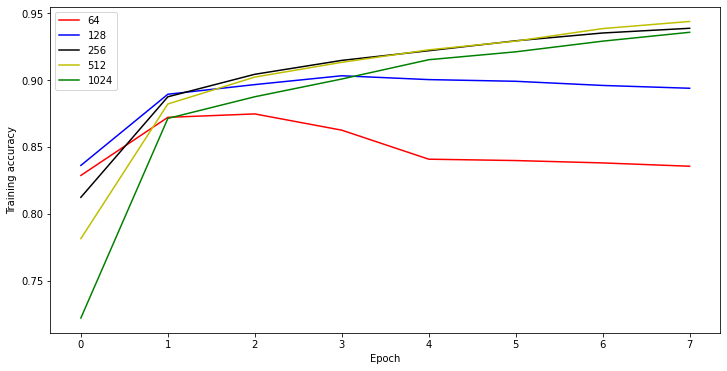

In [42]:
plt.figure(figsize=(12,6))

plt.plot(test_history_bs[0].history['accuracy'], c = 'r',label='64')
plt.plot(test_history_bs[1].history['accuracy'], c = 'b',label='128')
plt.plot(test_history.history['accuracy'], c = 'k',label='256')
plt.plot(test_history_bs[2].history['accuracy'], c = 'y',label='512')
plt.plot(test_history_bs[3].history['accuracy'], c = 'g',label='1024')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

# 4. Various FC hidden layers

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 11, 11, 28)        7084      
                                                                 
 flatten_34 (Flatten)        (None, 3388)              0         
                                                                 
 dense_124 (Dense)           (None, 1024)              3470336   
                                                                 
 dense_125 (Dense)           (None, 512)               524800    
                                                     

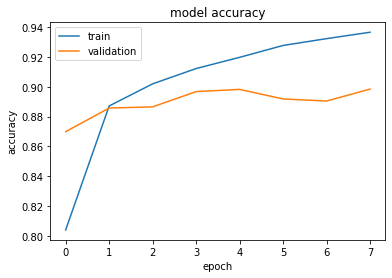

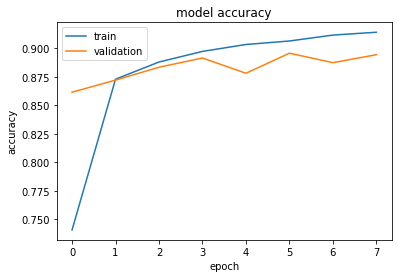

In [51]:
# hyper parameters
epochs = 8
batch_size = 256
learning_rate = 0.01
test_history_hl = [0,0]

for i in range(2):
  # define model
  model = Sequential()
  model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(Flatten())
  if(i == 0):
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(512, activation = 'relu'))
  else:
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
  model.add(Dense(num_classes, activation = 'softmax'))
  optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
  model.build((None,28,28,1))
  model.summary()

  test_history_hl[i] = model.fit(x_train, y_train, batch_size = batch_size,
            epochs = epochs,
            verbose=2,
            validation_data=(x_test,y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print("Loss: {}".format(score[0]))
  print("Accuracy: {}".format(score[1]))

#  "Accuracy"
for h in test_history_hl:
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

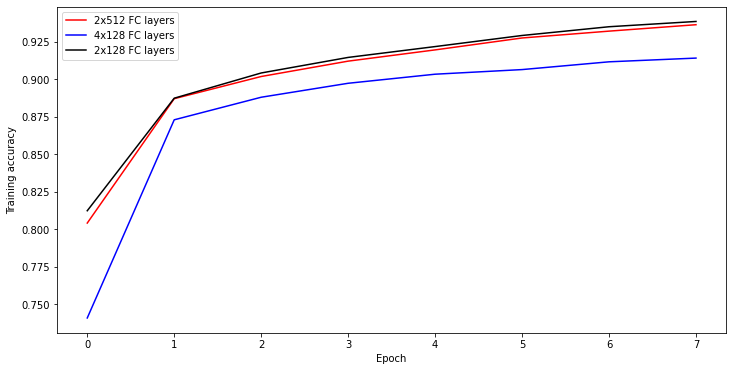

In [52]:
plt.figure(figsize=(12,6))

plt.plot(test_history_hl[0].history['accuracy'], c = 'r',label='2x512 FC layers')
plt.plot(test_history_hl[1].history['accuracy'], c = 'b',label='4x128 FC layers')
plt.plot(test_history.history['accuracy'], c = 'k',label='2x128 FC layers')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

# 5. Various convolutional layers

baseline model
2 layers 64 filters
1 layer

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 flatten_24 (Flatten)        (None, 7744)              0         
                                                                 
 dense_88 (Dense)            (None, 128)               991360    
                                                                 
 dense_89 (Dense)            (None, 128)               16512     
                                                     

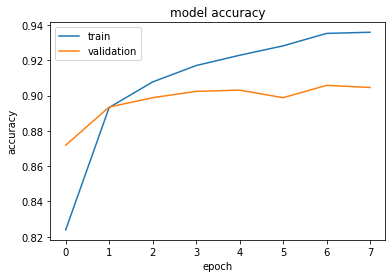

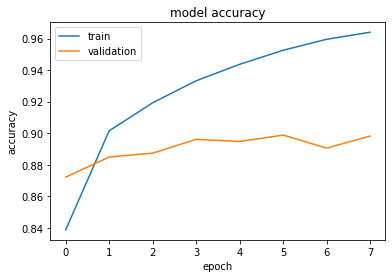

In [16]:
# hyper parameters
epochs = 8
batch_size = 256
learning_rate = 0.01
test_history_cl = [0,0]

for i in range(2):
  # define model
  model = Sequential()
  if(i == 0):
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = input_shape))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  else:
    model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'sigmoid'))
  model.add(Dense(num_classes, activation = 'softmax'))
  optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
  model.build((None,28,28,1))
  model.summary()

  test_history_cl[i] = model.fit(x_train, y_train, batch_size = batch_size,
            epochs = epochs,
            verbose=2,
            validation_data=(x_test,y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print("Loss: {}".format(score[0]))
  print("Accuracy: {}".format(score[1]))

#  "Accuracy"
for h in test_history_cl:
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

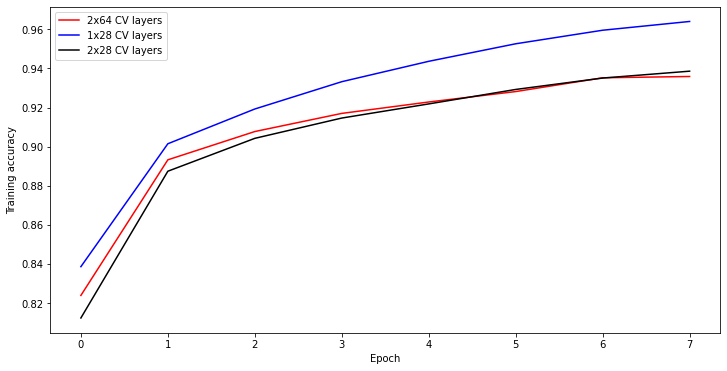

In [53]:
plt.figure(figsize=(12,6))

plt.plot(test_history_cl[0].history['accuracy'], c = 'r',label='2x64 CV layers')
plt.plot(test_history_cl[1].history['accuracy'], c = 'b',label='1x28 CV layers')
plt.plot(test_history.history['accuracy'], c = 'k',label='2x28 CV layers')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

# 6. Final Model

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_4 (ZeroPaddi  (None, 30, 30, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_79 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 zero_padding2d_5 (ZeroPaddi  (None, 30, 30, 28)       0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 28, 28, 28)        7084      
                                                                 
 flatten_38 (Flatten)        (None, 21952)             0         
                                                                 
 dense_138 (Dense)           (None, 128)             

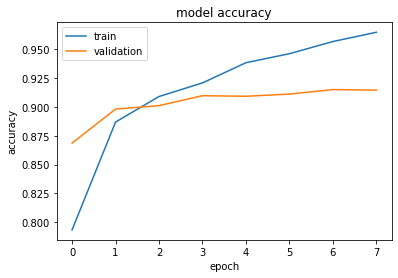

In [56]:
# hyper parameters
epochs = 8
batch_size = 512
learning_rate = 0.005

# define model
model = Sequential()
model.add(ZeroPadding2D())
model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(ZeroPadding2D())
model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')
model.build((None,28,28,1))
model.summary()

test_history_final = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs,
          verbose=2,
          validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss: {}".format(score[0]))
print("Accuracy: {}".format(score[1]))

#  "Accuracy"
plt.plot(test_history_final.history['accuracy'])
plt.plot(test_history_final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

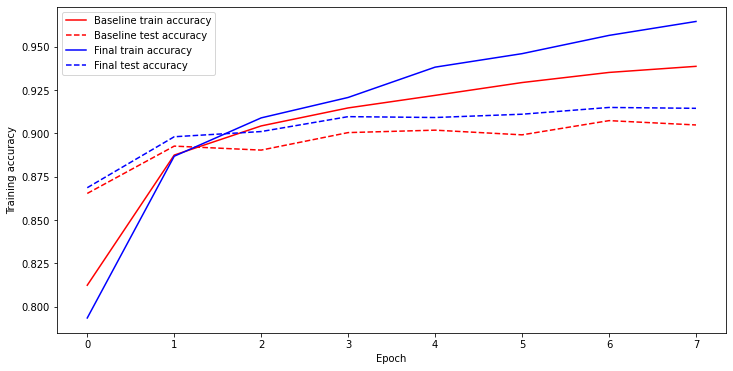

In [59]:
plt.figure(figsize=(12,6))

plt.plot(test_history.history['accuracy'], c = 'r',label='Baseline train accuracy')
plt.plot(test_history.history['val_accuracy'], c = 'r',linestyle='dashed',label='Baseline test accuracy')

plt.plot(test_history_final.history['accuracy'], c = 'b',label='Final train accuracy')
plt.plot(test_history_final.history['val_accuracy'], c = 'b',linestyle='dashed',label='Final test accuracy')

plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()